In [1]:
import random
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation of fragment count

## 1. nasctools

20221128	human	all
20221128	human	rmdup
20221128	fly	all
20221128	fly	rmdup
20221205	human	all
20221205	human	rmdup
20221205	fly	all
20221205	fly	rmdup


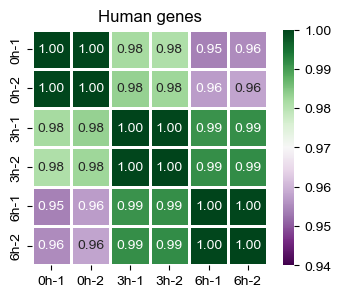

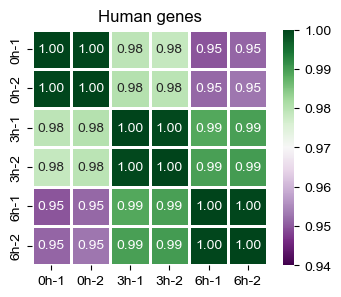

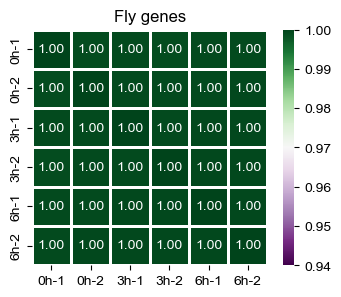

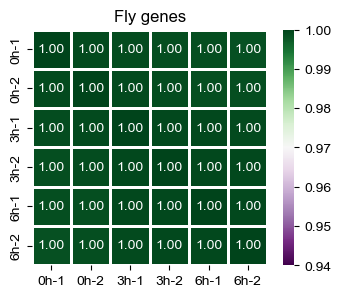

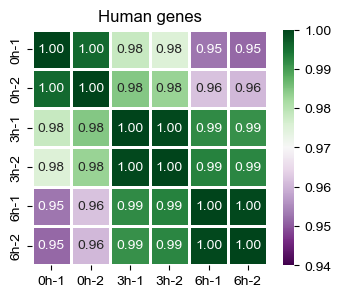

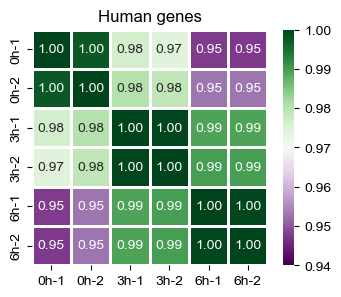

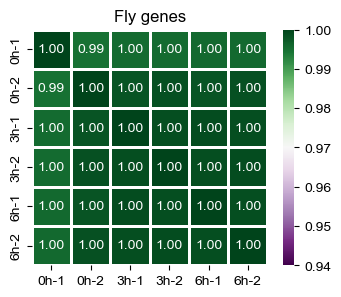

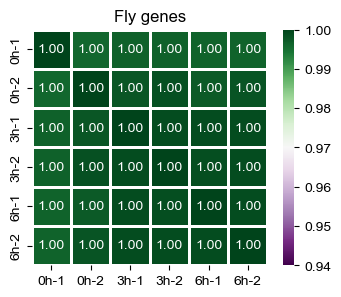

In [31]:
dates = ["20221128", "20221205"]
species_list = ["human", "fly"]
columns = ["0h-1", "0h-2", "3h-1", "3h-2", "6h-1", "6h-2"]
sources = ["all", "rmdup"]

def stat_expr_corr(date, species, source):
    samples = []
    for t in [0, 3, 6]:
        for r in [1, 2]:
            s = "%s_K562_Actd_%dh_rep%d" % (date, t, r)
            samples.append(s)
    array = []
    for s, c in zip(samples, columns):
        path = "results/expression/fpkm/%s.%s.%s.tsv" % (s, species, source)
        d = pd.read_csv(path, sep="\t", index_col=0)
        d = d[(d["GeneType"] == "protein_coding") & (d["Canonical"])]
        d = d[~d["GeneName"].duplicated()]
        ss = d["Count"]
        ss.name = c
        ss.index = d["GeneName"]
        array.append(ss)
    dat = pd.concat(array, axis=1)
    tmp = dat[dat.mean(axis=1) >= 100]
    corr = tmp.corr()
    vmin = 0.94
    plt.figure(figsize=(3.6, 3))
    if species == "human":
        plt.title("Human genes")
    else:
        plt.title("Fly genes")
    # plt.title("Count corr (%s, %s, %s)" % (date, species, source))
    sns.heatmap(corr, cmap="PRGn", vmin=vmin, vmax=1, annot=True, fmt=".2f", lw=1, square=True)
    plt.tight_layout()
    plt.savefig("figures/fragment_count_corr.%s.%s.%s.pdf" % (date, species, source), dpi=300)

for date in dates:
    for species in species_list:
        for source in sources:
            print(date, species, source, sep="\t")
            stat_expr_corr(date, species, source)

## 2. featureCount

20221128	human	all
61533 11138


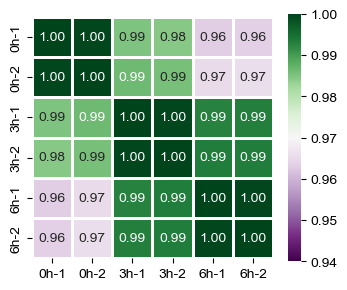

20221128	human	rmdup
61533 10703


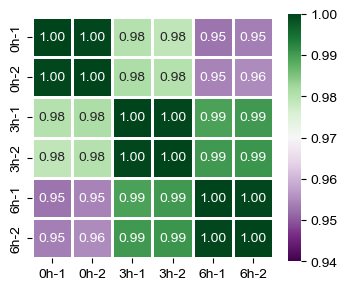

20221128	fly	all
23932 7981


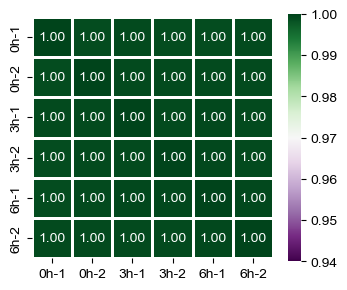

20221128	fly	rmdup
23932 7224


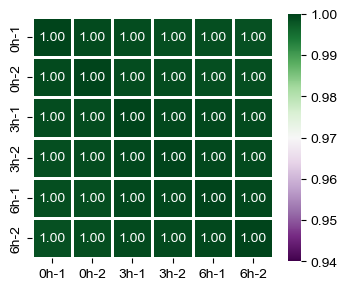

20221205	human	all
61533 11320


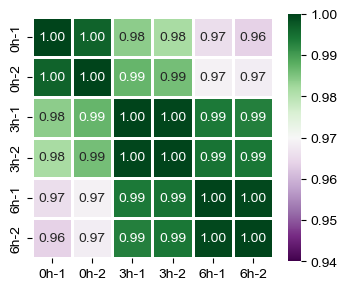

20221205	human	rmdup
61533 10939


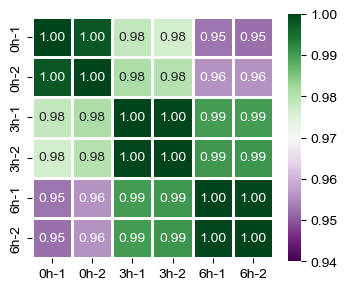

20221205	fly	all
23932 6052


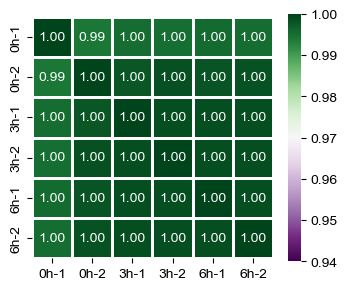

20221205	fly	rmdup
23932 5237


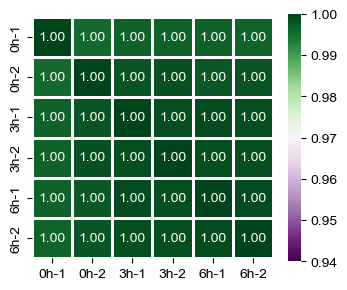

In [4]:
dates = ["20221128", "20221205"]
species_list = ["human", "fly"]
columns = ["0h-1", "0h-2", "3h-1", "3h-2", "6h-1", "6h-2"]
sources = ["all", "rmdup"]

def stat_expr_corr(date, species, source):
    samples = []
    for t in [0, 3, 6]:
        for r in [1, 2]:
            s = "%s_K562_Actd_%dh_rep%d" % (date, t, r)
            samples.append(s)
    array = []
    for s, c in zip(samples, columns):
        path = "results/expression/feature_count/%s.%s.%s.tsv" % (s, species, source)
        d = pd.read_csv(path, sep="\t", index_col=0, comment="#")
        ss = d[d.columns[-1]]
        ss.name = "Count"
        ss.name = c
        array.append(ss)
    dat = pd.concat(array, axis=1)
    
    tmp = dat[dat.mean(axis=1) >= 100]
    corr = tmp.corr()
    print(len(dat), len(tmp))
    
    vmin = 0.94
    
    plt.figure(figsize=(3.6, 3))
    # plt.title("Count corr (%s, %s, %s)" % (date, species, source))
    sns.heatmap(corr, cmap="PRGn", vmin=vmin, vmax=1, annot=True, fmt=".2f", lw=1, square=True)
    plt.tight_layout()
    plt.show()
    plt.close()
    
for date in dates:
    for species in species_list:
        for source in sources:
            print(date, species, source, sep="\t")
            stat_expr_corr(date, species, source)

20221128	human	all
61533 11138


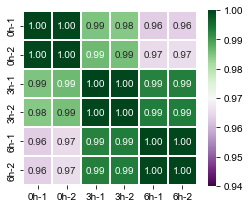

20221128	human	rmdup
61533 10703


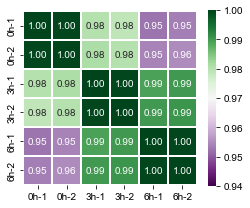

20221128	fly	all
23932 7981


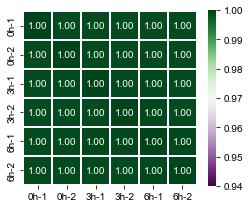

20221128	fly	rmdup
23932 7224


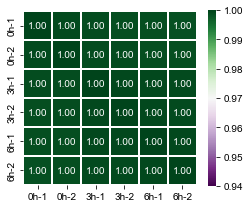

20221205	human	all
61533 11320


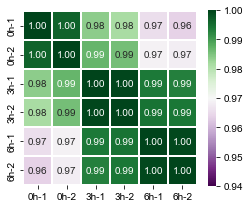

20221205	human	rmdup
61533 10939


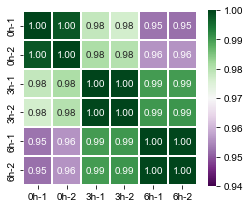

20221205	fly	all
23932 6052


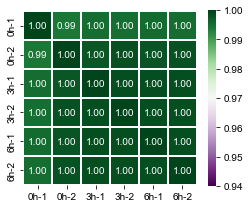

20221205	fly	rmdup
23932 5237


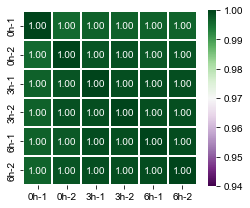

In [12]:
dates = ["20221128", "20221205"]
species_list = ["human", "fly"]
columns = ["0h-1", "0h-2", "3h-1", "3h-2", "6h-1", "6h-2"]
sources = ["all", "rmdup"]

def stat_expr_corr(date, species, source):
    samples = []
    for t in [0, 3, 6]:
        for r in [1, 2]:
            s = "%s_K562_Actd_%dh_rep%d" % (date, t, r)
            samples.append(s)
    array = []
    for s, c in zip(samples, columns):
        path = "results/expression/feature_count/%s.%s.%s.tsv" % (s, species, source)
        d = pd.read_csv(path, sep="\t", index_col=0, comment="#")
        ss = d[d.columns[-1]]
        ss.name = "Count"
        ss.name = c
        array.append(ss)
    dat = pd.concat(array, axis=1)
    
    tmp = dat[dat.mean(axis=1) >= 100]
    corr = tmp.corr()
    print(len(dat), len(tmp))
    
    vmin = 0.94
    
    plt.figure(figsize=(3.6, 3))
    # plt.title("Count corr (%s, %s, %s)" % (date, species, source))
    sns.heatmap(corr, cmap="PRGn", vmin=vmin, vmax=1, annot=True, fmt=".2f", lw=1, square=True)
    plt.tight_layout()
    plt.show()
    # plt.savefig("figures/fragment_count_coree.%s.%s.%s.pdf" % (date, species, source), dpi=300)
    plt.close()
    
for date in dates:
    for species in species_list:
        for source in sources:
            print(date, species, source, sep="\t")
            stat_expr_corr(date, species, source)

# 2. Estimation of conversion factor

calculate fragment count by nasctools

In [15]:
dates = ["20221128", "20221205"]
columns = ["0h-1", "0h-2", "3h-1", "3h-2", "6h-1", "6h-2"]

In [17]:
for date in dates:
    samples = []
    for time in [0, 3, 6]:
        for rep in [1, 2]:
            samples.append("%s_K562_Actd_%dh_rep%d" % (date, time, rep))
            
    array = []
    for sample, column in zip(samples, columns):
        path = "results/expression/fpkm/%s.fly.rmdup.tsv" % sample
        d = pd.read_csv(path, sep="\t", index_col=0)
        d = d[(d["GeneType"] == "protein_coding") & (d["Canonical"])]
        d = d[~d["GeneName"].duplicated()]
        s = d["Count"]
        s.name = column
        s.index = d["GeneName"]
        array.append(s)
    m = pd.concat(array, axis=1)
    m.to_csv("results/halflife/counts.%s.tsv" % date, sep="\t")

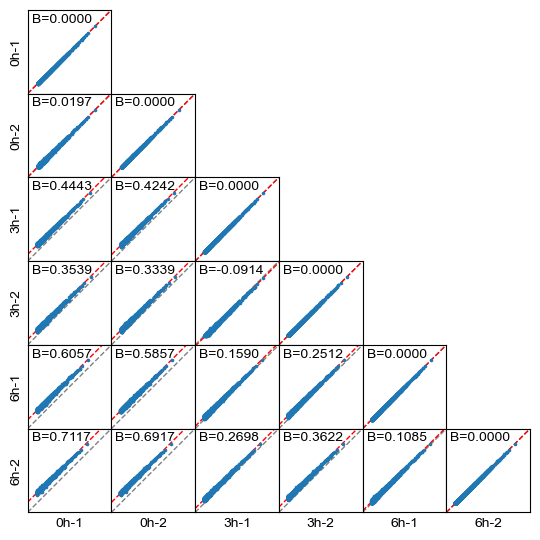

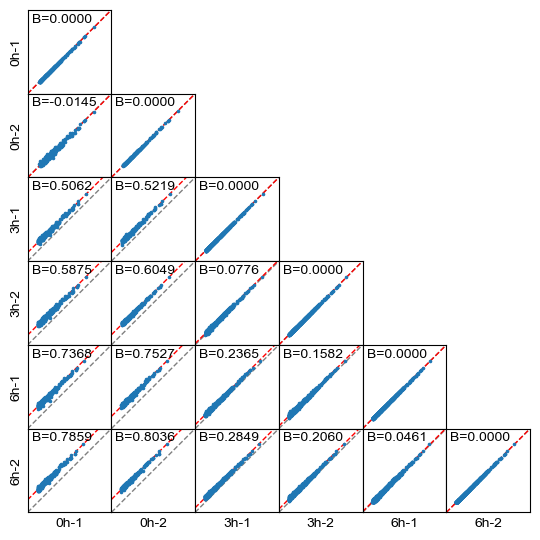

In [20]:
def get_k(xs, ys):
    xs = np.log(xs)
    ys = np.log(ys)
    b = (sum(ys) - sum(xs)) / len(xs)
    k = np.e ** b
    return k
    
for date in dates:
    dat = pd.read_csv("results/halflife/counts.%s.tsv" % date, sep="\t", index_col=0)
    factors = dict()
    fig, axs = plt.subplots(len(columns), len(columns), figsize=(5.5, 5.5), gridspec_kw={"wspace": 0, "hspace": 0})
    for i in range(len(columns)):
        for j in range(len(columns)):
            c1 = columns[j]
            c2 = columns[i]
            xs = dat[c1]
            ys = dat[c2]
            flags = (xs > 500) & (ys > 500)
            xs = xs[flags]
            ys = ys[flags]
            k = get_k(xs, ys)
            b = np.log(k)
            xs = np.log(xs)
            ys = np.log(ys)
            a1, b1 = np.polyfit(xs, ys, 1)
            vmin = min(min(xs), min(ys)) * 0.9
            vmax = max(max(xs), max(ys)) * 1.1
            factors["%s,%s" % (c1, c2)] = k
            if j > i:
                axs[i][j].set_visible(False)
                continue
            plt.sca(axs[i][j])
            plt.scatter(xs, ys, marker=".", alpha=1, color="C0", s=10, zorder=10)
            plt.xlim(vmin, vmax)
            plt.ylim(vmin, vmax)
            plt.plot([vmin, vmax], [vmin, vmax], ls="--", lw=1, color="grey")
            plt.plot([vmin, vmax], [vmin + b, vmax + b], ls="--", lw=1, color="red")
            w = vmax - vmin
            plt.text(vmin + w * 0.05, vmin + w * 0.85, "B=%.4f" % b)
            if i == len(columns) - 1:
                plt.xlabel(c1)
            else:
                plt.xticks([])
            if j == 0:
                plt.ylabel(c2)
            else:
                plt.yticks([])
            plt.xticks([])
            plt.yticks([])
    plt.tight_layout()
    plt.savefig("figures/conversion_factors_scatter.%s.pdf" % date, dpi=300)
    
    with open("results/halflife/conversion_factors.%s.json" % date, "w+") as fw:
        json.dump(factors, fw, indent=4)

# 3. Estimation of half-life

In [21]:
anno = pd.read_csv("/lustre/grp/tfclab/chenzg/species/homo_sapiens/GRCh38.p13/gencode.v39.annotation.tsv", sep="\t", index_col=0)

In [22]:
columns = ["0h-1", "0h-2", "3h-1", "3h-2", "6h-1", "6h-2"]

def calculate_halflife(date):
    with open("results/halflife/conversion_factors.%s.json" % date) as f:
        factors = json.load(f)
    samples = []
    for t in [0, 3, 6]:
        for r in [1, 2]:
            samples.append("%s_K562_Actd_%dh_rep%d" % (date, t, r))
    array1 = []
    array2 = []
    for s, c in zip(samples, columns):
        path = "results/expression/fpkm/%s.human.rmdup.tsv" % s
        d = pd.read_csv(path, sep="\t", index_col=0)
        ss = d["FPKM"]
        ss.name = c + "_fpkm"
        array1.append(ss)
        ss = d["Count"]
        ss.name = c
        array2.append(ss)
    df1 = pd.concat(array1, axis=1)
    df2 = pd.concat(array2, axis=1)
    df = pd.concat([df1, df2], axis=1)
    for c in columns:
        factor = factors["%s,%s" % (c, "0h-1")]
        df[c + "_adj"] = df[c] * factor
    mean_0 = df[["0h-1_adj", "0h-2_adj"]].mean(axis=1)
    for c in columns:
        df[c + "_adj_p"] = df[c + "_adj"] / mean_0
    Ts = []
    Ds = []
    for vs in df[[c + "_adj_p" for c in columns]].values:
        xs0 = [0, 0, 3, 3, 6, 6]
        ys0 = vs
        ys = ys0[2:]
        xs = np.array([3, 3, 6, 6])
        Y = np.log2(-np.log2(ys))
        X = np.log2(xs)
        b = sum(Y - X) / len(Y)
        T = 1 / (2 ** b)
        D = sum([abs(y - 2 ** (-x/T)) for x, y in zip(xs0, ys0)])
        Ts.append(T)
        Ds.append(D)
    df["T"] = Ts
    df["D"] = Ds
    df = df.merge(anno, left_index=True, right_index=True)
    df.to_csv("results/halflife/%s_AtcD_halflife.tsv" % date, sep="\t")
    
dates = ["20221128", "20221205"]
for date in dates:
    calculate_halflife(date)

/lustre/grp/tfclab/chenzg/tmp/ipykernel_3019709/1011997264.py:37: RuntimeWarning: divide by zero encountered in log2
  Y = np.log2(-np.log2(ys))
/lustre/grp/tfclab/chenzg/tmp/ipykernel_3019709/1011997264.py:37: RuntimeWarning: invalid value encountered in log2
  Y = np.log2(-np.log2(ys))
/lustre/grp/tfclab/chenzg/tmp/ipykernel_3019709/1011997264.py:41: RuntimeWarning: invalid value encountered in scalar divide
  D = sum([abs(y - 2 ** (-x/T)) for x, y in zip(xs0, ys0)])
/lustre/grp/tfclab/chenzg/tmp/ipykernel_3019709/1011997264.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  D = sum([abs(y - 2 ** (-x/T)) for x, y in zip(xs0, ys0)])
/lustre/grp/tfclab/chenzg/tmp/ipykernel_3019709/1011997264.py:37: RuntimeWarning: invalid value encountered in log2
  Y = np.log2(-np.log2(ys))
/lustre/grp/tfclab/chenzg/tmp/ipykernel_3019709/1011997264.py:37: RuntimeWarning: divide by zero encountered in log2
  Y = np.log2(-np.log2(ys))
/lustre/grp/tfclab/chenzg/tmp/ipykernel_3019709/101

# 4. Correlation of halflife

6597 6789
Genes: 4884


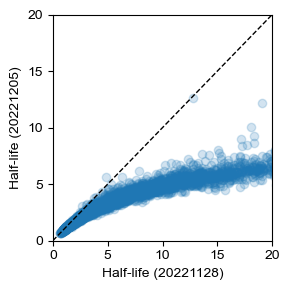

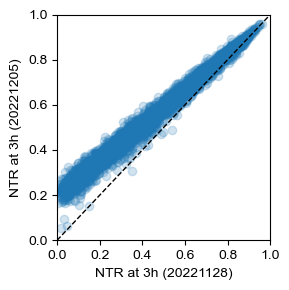

In [24]:
def load_halflife(path):
    df = pd.read_csv(path, sep="\t", index_col=0)
    df = df[df["Canonical"]]
    df = df[df["GeneType"] == "protein_coding"]
    df = df[df[[c for c in columns]].max(axis=1) > 50]
    df = df[df[[c + "_fpkm" for c in columns]].max(axis=1) > 1]
    df = df[df["D"] < 0.3]
    return df

df1 = load_halflife("results/halflife/20221128_AtcD_halflife.tsv")
df2 = load_halflife("results/halflife/20221205_AtcD_halflife.tsv")
print(len(df1), len(df2))

genes = list(set(df1.index) & set(df2.index))
print("Genes:", len(genes))

xs = df1.loc[genes]["T"]
ys = df2.loc[genes]["T"]
plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([0, 20], [0, 20], lw=1, ls="--", color="black")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.yticks([0, 5, 10, 15, 20])
plt.xlabel("Half-life (20221128)")
plt.ylabel("Half-life (20221205)")
plt.tight_layout()
plt.savefig("figures/correlation_of_halflife.pdf", dpi=300)

xs = 1 - 2**(-3/xs)
ys = 1 - 2**(-3/ys)
plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, alpha=0.2)
plt.plot([0, 1], [0, 1], lw=1, ls="--", color="black")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("NTR at 3h (20221128)")
plt.ylabel("NTR at 3h (20221205)")
plt.tight_layout()
plt.savefig("figures/correlation_of_ntr.pdf", dpi=300)

# 5. Half-life of star genes

MYC, PDLIM5, ACTB, GAPDH

In [25]:
df = pd.read_csv("results/halflife/20221128_AtcD_halflife.tsv", sep="\t", index_col=0)

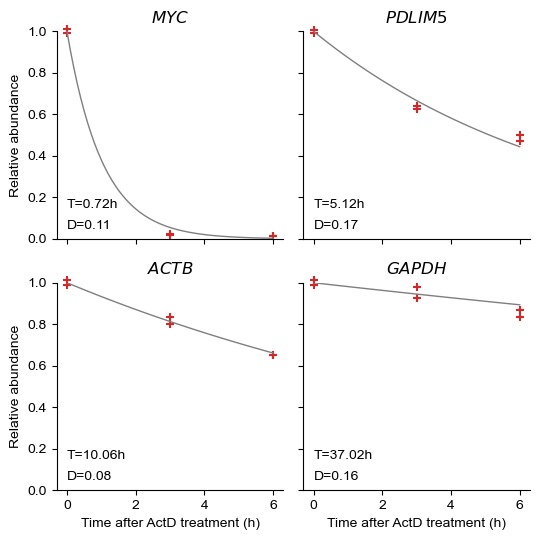

In [29]:
tids = [
    "ENST00000621592.8", # MYC
    "ENST00000317968.9", # PDLIM5
    "ENST00000646664.1", # ACTB
    "ENST00000229239.10", # GAPDH
]

fig, axs = plt.subplots(2, 2, figsize=(5.5, 5.5), sharex=True, sharey=True)

for i, tid in enumerate(tids):
    m = int(i / 2)
    n = i % 2
    plt.sca(axs[m][n])
    
    T = df.loc[tid]["T"]
    D = df.loc[tid]["D"]
    gname = df.loc[tid]["GeneName"]
    xs = np.array([0, 0, 3, 3, 6, 6])
    ys = df.loc[tid][["0h-1_adj_p", "0h-2_adj_p", "3h-1_adj_p", "3h-2_adj_p", "6h-1_adj_p", "6h-2_adj_p"]]
    xs1 = np.arange(0, 6.1, 0.1)
    ys1 = np.array([0.5**(x/T)for x in xs1])
    
    plt.title("$\it{%s}$" % gname)
    plt.scatter(xs, ys, color="C3", marker="+", clip_on=False)
    plt.plot(xs1, ys1, lw=1, color="C7")
    plt.text(0, 0.15, "T=%.2fh" % T)
    plt.text(0, 0.05, "D=%.2f" % D)
    if m == 1:
        plt.xlabel("Time after ActD treatment (h)")
    if n == 0:
        plt.ylabel("Relative abundance")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("figures/decay_curve.transcripts.pdf", dpi=300)

# 6. Quantification of intron

In [28]:
dates = ["20221128", "20221205"]
samples = ["0h-1", "0h-2", "3h-1", "3h-2", "6h-1", "6h-2"]

for date in dates:
    factors = json.load(open("results/halflife/conversion_factors.%s.json" % date))
    paths = [
        "results/introns/counts/%s_K562_Actd_0h_rep1.tsv" % date,
        "results/introns/counts/%s_K562_Actd_0h_rep2.tsv" % date,
        "results/introns/counts/%s_K562_Actd_3h_rep1.tsv" % date,
        "results/introns/counts/%s_K562_Actd_3h_rep2.tsv" % date,
        "results/introns/counts/%s_K562_Actd_6h_rep1.tsv" % date,
        "results/introns/counts/%s_K562_Actd_6h_rep2.tsv" % date]
    
    array = []
    for sample, path in zip(samples, paths):
        d = pd.read_csv(path, sep="\t", header=None)
        d.columns = ["Chrom", "Start", "End", "Name", "Count", "Strand"]
        s = d["Count"]
        s.name = sample
        array.append(s)
    dat = pd.concat(array, axis=1)
    dat = pd.concat([d[["Chrom", "Start", "End", "Strand"]], dat], axis=1)

    dat.index = ["%s_%s_%s" % (chrom, start, end) for chrom, start, end in dat[["Chrom", "Start", "End"]].values]
    dat.index.name = "ID"

    for sample in samples:
        x = factors["%s,%s" % (sample, "0h-1")]
        dat["%s_adj" % sample] = dat[sample] * x
    for sample in samples:
        dat["%s_adj_p" % sample] = dat["%s_adj" % sample] / dat[["0h-1_adj", "0h-2_adj"]].mean(axis=1)
        
    dat.to_csv("results/introns/normalized_counts.%s.tsv" % date, sep="\t")

# 7. Allele-specific decay diversity

In [45]:
data_factors = json.load(open("results/transform_factor.json"))
dates = ["20221128", "20221205"]
columns = ["0h-1", "0h-2", "3h-1", "3h-2", "6h-1", "6h-2"]

date = dates[0]
samples = []
for t in [0, 3, 6]:
    for r in [1, 2]:
        s = "%s_K562_Actd_%dh_rep%d" % (date, t, r)
        samples.append(s)
array = []
for sample, column in zip(samples, columns):
    d = pd.read_csv("results/snps/counts/%s.tsv" % sample, sep="\t")
    d.index = ["%s:%d" % (chrom, start) for chrom, start in d[["Chrom", "Start"]].values]
    d = d[d.columns[3:]]
    d.columns = ["%s_%s" % (column, c) for c in d.columns]
    array.append(d)
df = pd.concat(array, axis=1, join="outer").fillna(0)

In [80]:
for hp in ["HP1", "HP2"]:
    for column in columns:
        factor = data_factors[date]["%s,0h-1" % column]
        # df["%s_%s" % (column, hp)] * factor
        df["%s_%s_adj" % (column, hp)] = df["%s_%s" % (column, hp)] * factor
        
    mean_0 =  df[["0h-1_%s_adj" % hp, "0h-2_%s_adj" % hp]].mean(axis=1)
    for column in columns:
        df["%s_%s_adj_p" % (column, hp)] = df["%s_%s_adj" % (column, hp)] / mean_0
        
    Ts = []
    Ds = []
    for vs in df[[c + "_%s_adj_p" % hp for c in columns]].values:
        xs0 = [0, 0, 3, 3, 6, 6]
        ys0 = vs
        ys = ys0[2:]
        xs = np.array([3, 3, 6, 6])
        Y = np.log2(-np.log2(ys))
        X = np.log2(xs)
        b = sum(Y - X) / len(Y)
        T = 1 / (2 ** b)
        D = sum([abs(y - 2 ** (-x/T)) for x, y in zip(xs0, ys0)])
        Ts.append(T)
        Ds.append(D)
    df["T_%s" % hp] = Ts
    df["D_%s" % hp] = Ds
    df["P_Nascent_%s" % hp] = 1 - 0.5 ** (3 / df["T_%s" % hp])
    df["K_%s" % hp] = mean_0 / df["T_%s" % hp] * np.log(2)

/home/chenzonggui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log2
/home/chenzonggui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log2
/home/chenzonggui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/chenzonggui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [81]:
df1 = df[(df["0h-1_Assigned%"] > 0.95) & (df["0h-2_Assigned%"] > 0.95)] # assigned
df1 = df1[(df1["0h-1_Log2FC"].abs() < 2) & (df1["0h-2_Log2FC"].abs() < 2)]
df1 = df1[(df1["D_HP1"] < 0.2) & (df1["D_HP2"] < 0.2)]
df1

,0h-1_UnAssinged,0h-1_HP1,0h-1_HP2,0h-1_Assigned,0h-1_Assigned%,0h-1_Log2FC,0h-2_UnAssinged,0h-2_HP1,0h-2_HP2,0h-2_Assigned,...,6h-1_HP2_adj_p,6h-2_HP2_adj_p,T_HP1,D_HP1,T_HP2,D_HP2,P_Nascent_HP1,P_Nascent_HP2,K_HP1,K_HP2
chr1:2308943,0,38,33,71,1.000000,0.203533,1,38,36,74,...,0.032133,0.043604,1.443515,0.053451,1.409918,0.166829,0.763200,0.771191,18.041512,16.761817
chr1:42926578,2,213,354,567,0.996485,-0.732896,1,210,338,548,...,0.118457,0.121645,2.002636,0.079319,2.016026,0.103092,0.645962,0.643512,72.385907,117.653544
chr1:42929963,0,212,277,489,1.000000,-0.385822,0,218,316,534,...,0.117804,0.130256,1.847667,0.105555,2.127734,0.192365,0.675491,0.623675,79.736362,95.431741
chr1:42930742,2,195,301,496,0.995984,-0.626289,1,210,321,531,...,0.167512,0.132196,2.042205,0.111158,2.157529,0.176763,0.638767,0.618562,67.928684,98.754181
chr1:65392461,0,100,39,139,1.000000,1.358454,0,92,42,134,...,0.095796,0.061902,1.449124,0.172438,1.567438,0.140376,0.761876,0.734635,45.423662,17.700770
chr1:150966094,4,428,233,661,0.993985,0.877281,4,446,233,679,...,0.661010,0.613049,8.150978,0.091018,10.496497,0.177152,0.225173,0.179719,36.735046,15.213257
chr1:203852185,0,106,53,159,1.000000,1.000000,0,113,54,167,...,0.176060,0.215490,2.780268,0.129937,2.360902,0.107709,0.526654,0.585542,26.982371,15.528887
chr1:230281203,3,56,138,194,0.984772,-1.301170,2,57,130,187,...,0.661282,0.646845,20.126840,0.168276,8.933353,0.170509,0.098159,0.207666,1.923711,10.283679
chr1:230281917,0,35,91,126,1.000000,-1.378512,0,36,96,132,...,0.628269,0.697060,7.428705,0.139864,9.119671,0.158591,0.244156,0.203889,3.274585,7.024428
chr1:241872135,0,139,56,195,1.000000,1.311586,0,137,55,192,...,0.119774,0.117385,2.042249,0.124094,1.727890,0.183848,0.638760,0.699845,46.314500,22.015685


limit_output extension: Maximum message size of 10000 exceeded with 31699 characters

In [82]:
df1[["0h-1_HP1_adj", "0h-2_HP1_adj", "0h-1_HP2_adj", "0h-2_HP2_adj", "T_HP1", "T_HP2", "P_Nascent_HP1", "P_Nascent_HP2"]]

,0h-1_HP1_adj,0h-2_HP1_adj,0h-1_HP2_adj,0h-2_HP2_adj,T_HP1,T_HP2,P_Nascent_HP1,P_Nascent_HP2
chr1:2308943,38.0,37.144779,33.0,35.189791,1.443515,1.409918,0.763200,0.771191
chr1:42926578,213.0,205.273781,354.0,330.393038,2.002636,2.016026,0.645962,0.643512
chr1:42929963,212.0,213.093735,277.0,308.888166,1.847667,2.127734,0.675491,0.623675
chr1:42930742,195.0,205.273781,301.0,313.775637,2.042205,2.157529,0.638767,0.618562
chr1:65392461,100.0,89.929466,39.0,41.054756,1.449124,1.567438,0.761876,0.734635
chr1:150966094,428.0,435.962411,233.0,227.756148,8.150978,10.496497,0.225173,0.179719
chr1:203852185,106.0,110.456844,53.0,52.784687,2.780268,2.360902,0.526654,0.585542
chr1:230281203,56.0,55.717169,138.0,127.074245,20.126840,8.933353,0.098159,0.207666
chr1:230281917,35.0,35.189791,91.0,93.839443,7.428705,9.119671,0.244156,0.203889
chr1:241872135,139.0,133.916705,56.0,53.762181,2.042249,1.727890,0.638760,0.699845


limit_output extension: Maximum message size of 10000 exceeded with 15089 characters

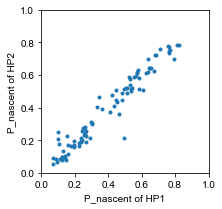

In [83]:
xs = df1["P_Nascent_HP1"]
ys = df1["P_Nascent_HP2"]
plt.figure(figsize=(3, 3))
plt.scatter(xs, ys, marker=".")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("P_nascent of HP1")
plt.ylabel("P_nascent of HP2")
plt.show()

In [85]:
df1[df1["P_Nascent_HP1"] / df1["P_Nascent_HP2"] > 2].iloc[0]

0h-1_UnAssinged      2.000000
0h-1_HP1           165.000000
0h-1_HP2            65.000000
0h-1_Assigned      230.000000
0h-1_Assigned%       0.991379
0h-1_Log2FC          1.343954
0h-2_UnAssinged      6.000000
0h-2_HP1           187.000000
0h-2_HP2            66.000000
0h-2_Assigned      253.000000
0h-2_Assigned%       0.976834
0h-2_Log2FC          1.502500
3h-1_UnAssinged      5.000000
3h-1_HP1           145.000000
3h-1_HP2            80.000000
3h-1_Assigned      225.000000
3h-1_Assigned%       0.978261
3h-1_Log2FC          0.857981
3h-2_UnAssinged      2.000000
3h-2_HP1           120.000000
3h-2_HP2            72.000000
3h-2_Assigned      192.000000
3h-2_Assigned%       0.989691
3h-2_Log2FC          0.736966
6h-1_UnAssinged      4.000000
6h-1_HP1            82.000000
6h-1_HP2            75.000000
6h-1_Assigned      157.000000
6h-1_Assigned%       0.975155
6h-1_Log2FC          0.128733
                      ...    
3h-1_HP1_adj        93.253383
3h-2_HP1_adj        84.084285
6h-1_HP1_a

In [2]:
m = pd.read_csv("results/snps/counts/20221128_K562_Actd_0h_rep1.tsv", sep="\t")
m

,Chrom,Start,End,UnAssinged,HP1,HP2,Assigned,Assigned%,Log2FC
0,chr1,14652,14653,1,47,16,63,0.984375,1.554589
1,chr1,15188,15189,2,11,5,16,0.888889,1.137504
2,chr1,15203,15204,2,11,6,17,0.894737,0.874469
3,chr1,15819,15820,3,11,8,19,0.863636,0.459432
4,chr1,16724,16725,4,33,14,47,0.921569,1.237039
...,...,...,...,...,...,...,...,...,...
16833,chrY,11155880,11155881,14,6,32,38,0.730769,-2.415037
16834,chrY,11163092,11163093,15,24,89,113,0.882812,-1.890771
16835,chrY,11209744,11209745,52,48,96,144,0.734694,-1.000000
16836,chrY,11214965,11214966,32,51,82,133,0.806061,-0.685127


(array([1200.,  486.,  390.,  385.,  394.,  511.,  708.,  992., 1937.,
        9835.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

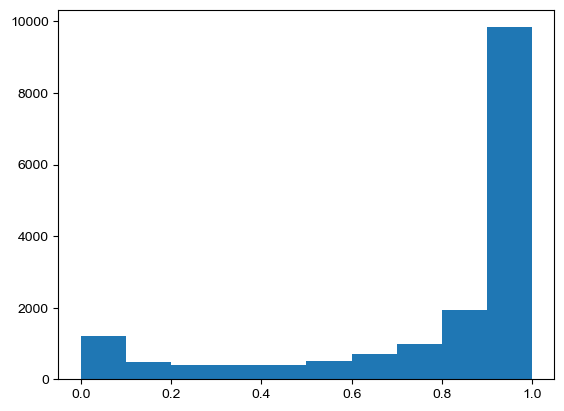

In [4]:
plt.hist(m["Assigned%"])